# metadynamics

## is the change in wall rare events?
### U over R

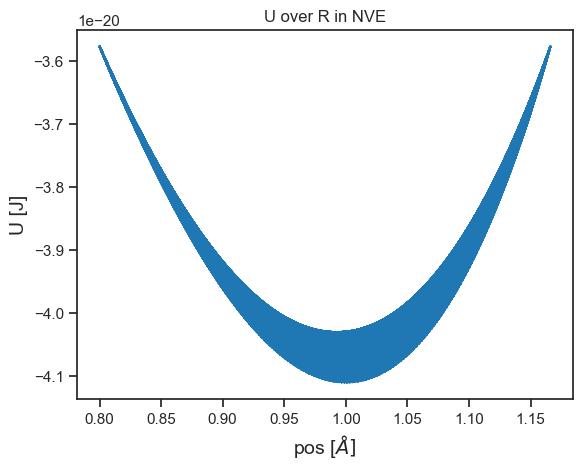

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df1 = pd.read_csv("simFor2Well.log", sep='\s+')

xyz = open("SimFor2Well.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    if(count % 3 != 2):
        pass
    else:
        line = i.split()
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

plt.title("U over R in NVE")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df1['U'])

### in const temp

768000


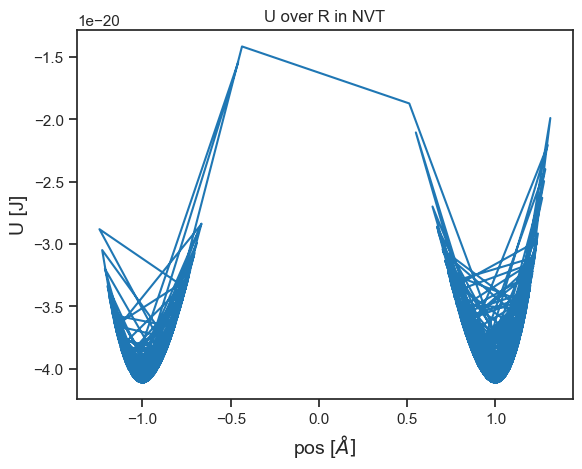

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df1 = pd.read_csv("simFor2Well_NVT.log", sep='\s+')

xyz = open("SimFor2Well_NVT.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df1['E'] - df1['K'])

768000.0


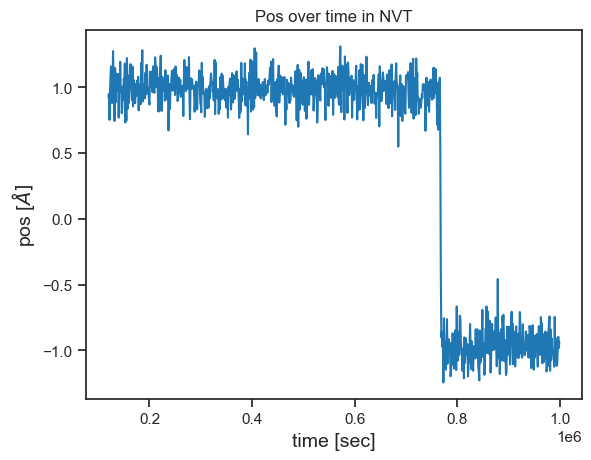

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimFor2Well_NVT.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT")
plt.xlabel("time [sec]")
plt.ylabel(r"pos [$\AA ]$")
plt.plot(time, posX)

# with MetaD

129000
158000
173000
178000
179000
188000
194000
195000
197000
199000
201000
207000
214000
223000
224000
226000
232000
242000
247000
253000
258000
270000
277000
280000
283000
289000
291000
292000
294000
297000
299000
301000
302000
306000
308000
310000
312000
316000
318000
320000
321000
323000
326000
335000
339000
340000
344000
345000
348000
351000
352000
363000
365000
369000
370000
371000
378000
381000
383000
390000
391000
394000
396000
400000
402000
403000
409000
410000
412000
413000
414000
415000
416000
420000
421000
423000
424000
428000
429000
430000
431000
433000
437000
438000
440000
441000
443000
444000
448000
449000
451000
453000
455000
460000
465000
466000
467000
469000
472000
474000
475000
476000
479000
484000
485000
487000
488000
490000
493000
497000
502000
505000
506000
513000
518000
523000
527000
531000
533000
534000
535000
537000
538000
539000
540000
543000
545000
548000
549000
551000
554000
555000
556000
559000
560000
562000
563000
566000
569000
570000
572000
573000
576000

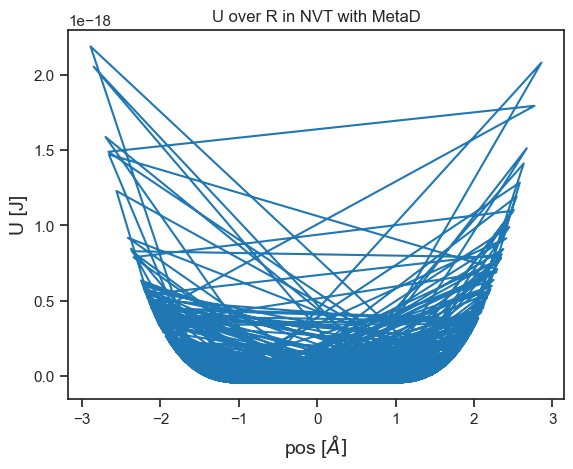

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df1 = pd.read_csv("simForMetaD.log", sep='\s+')

xyz = open("SimForMetaD.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df1['U'])

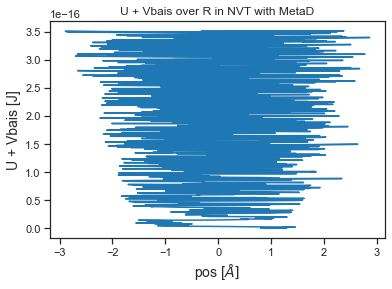

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df1 = pd.read_csv("simForMetaD.log", sep='\s+')

xyz = open("SimForMetaD.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("U + Vbais over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U + Vbais [J]")
plt.plot(posX, df1['E']- df1['K'])

129000.0
158000.0
173000.0
178000.0
179000.0
188000.0
194000.0
195000.0
197000.0
199000.0
201000.0
207000.0
214000.0
223000.0
224000.0
226000.0
232000.0
242000.0
247000.0
253000.0
258000.0
270000.0
277000.0
280000.0
283000.0
289000.0
291000.0
292000.0
294000.0
297000.0
299000.0
301000.0
302000.0
306000.0
308000.0
310000.0
312000.0
316000.0
318000.0
320000.0
321000.0
323000.0
326000.0
335000.0
339000.0
340000.0
344000.0
345000.0
348000.0
351000.0
352000.0
363000.0
365000.0
369000.0
370000.0
371000.0
378000.0
381000.0
383000.0
390000.0
391000.0
394000.0
396000.0
400000.0
402000.0
403000.0
409000.0
410000.0
412000.0
413000.0
414000.0
415000.0
416000.0
420000.0
421000.0
423000.0
424000.0
428000.0
429000.0
430000.0
431000.0
433000.0
437000.0
438000.0
440000.0
441000.0
443000.0
444000.0
448000.0
449000.0
451000.0
453000.0
455000.0
460000.0
465000.0
466000.0
467000.0
469000.0
472000.0
474000.0
475000.0
476000.0
479000.0
484000.0
485000.0
487000.0
488000.0
490000.0
493000.0
497000.0
502000.0
5

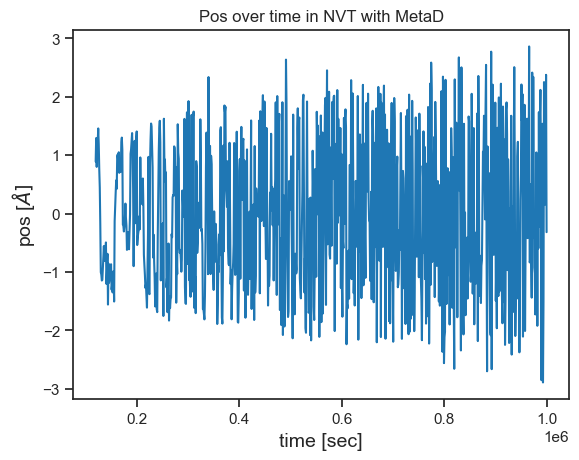

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD")
plt.xlabel("time [sec]")
plt.ylabel(r"pos [$\AA ]$")
plt.plot(time, posX)

-2.4605387424242705e-24
-1.1132313386469124e-22
-1.1304590649181955e-22
-1.1463162368991961e-22
-1.164079219681875e-22
-1.1776999868365864e-22
-1.19688197912273e-22
-1.210819912453367e-22
-1.2292403658376443e-22
-1.2457195762664703e-22
-1.2617743263975788e-22
-1.2775964461439e-22
-1.2902526243867015e-22
-1.3061616211945192e-22
-1.3210499920593363e-22
-1.3376302087777338e-22
-1.3518952548077832e-22
-1.3663592005312232e-22
-1.3812635151868884e-22
-1.3933544643777998e-22
-1.4064940580571047e-22
-1.421308898355151e-22
-1.4370673284326116e-22
-1.4525689646666407e-22
-1.461971972005104e-22
-1.4780951349356424e-22
-1.489940558194424e-22
-1.5040381456904074e-22
-1.518762607771221e-22
-1.5302064017660197e-22
-1.543637174786676e-22
-1.5560535154447694e-22
-1.5659752471244436e-22
-1.578807875779026e-22
-1.591895313155155e-22
-1.603517640926566e-22
-1.6160978075504528e-22
-1.628587607553503e-22
-1.6401774192492984e-22
-1.6528376922079376e-22
-1.6623733338424012e-22
-1.6728587019957956e-22
-1.68603

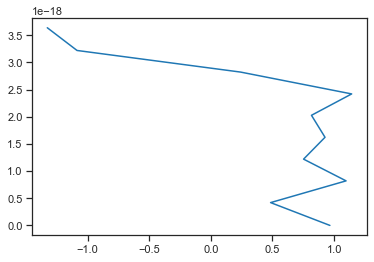

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df1 = pd.read_csv("simForMetaD.log", sep='\s+')
df2 = pd.read_csv("simForMetaD_p.log", sep='\s+')
df3 = pd.read_csv("simForMetaD_F.log", sep='\s+')

xyz = open("SimForMetaD.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

fill = 200000 -1  
Vbias = (df1['E'] - df1['K'] - df1['U'])